In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import io
import matplotlib.image as mpimg



In [3]:
crime_data = pd.read_csv("./atlcrime.csv",sep=",",low_memory=False)
crime_data.drop(['number','npu', 'beat'],axis=1,inplace=True) #remove useless colums
crime_data.dropna(axis=0, inplace=True) #drop null values
crime_data['date'] = pd.to_datetime(crime_data['date']) #give format to the dates
crime_data = crime_data.drop_duplicates(subset=['date','crime','lat', 'long'], keep=False) #remove duplicates
years=crime_data['date'].dt.year.unique() 
years = np.sort(years)
crime_data.head()


crime       date                                 location  \
1            AUTO THEFT 2010-10-31                            850 OAK ST SW   
2  LARCENY-FROM VEHICLE 2010-10-31                1344 METROPOLITAN PKWY SW   
3            AUTO THEFT 2010-10-31                         1752 PRYOR RD SW   
4   LARCENY-NON VEHICLE 2010-10-31  JOHN WESLEY DOBBS AVE NE / CORLEY ST NE   
5    BURGLARY-RESIDENCE 2010-10-31                       430 W WESLEY RD NW   

                neighborhood       lat      long  
1                   West End  33.74057 -84.41680  
2         Capitol View Manor  33.71803 -84.40774  
3             Betmar LaVilla  33.70731 -84.39674  
4            Old Fourth Ward  33.75947 -84.36626  
5  Peachtree Battle Alliance  33.82838 -84.40133

In [4]:
imgs= []
for year in years:
    print(f'Calculating graph for year {year}')
    crimePerYear = crime_data[crime_data['date'].dt.year == year]
    fig = px.scatter_mapbox(crimePerYear, lat="lat", lon="long", hover_name="location", hover_data=["crime"],
                            color_discrete_sequence=["fuchsia"], size_max=150, zoom=10)
    fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    imgs.append(mpimg.imread(io.BytesIO(fig.to_image(format="png"))))
 




Calculating graph for year 2009
Calculating graph for year 2010
Calculating graph for year 2011
Calculating graph for year 2012
Calculating graph for year 2013
Calculating graph for year 2014
Calculating graph for year 2015
Calculating graph for year 2016
Calculating graph for year 2017


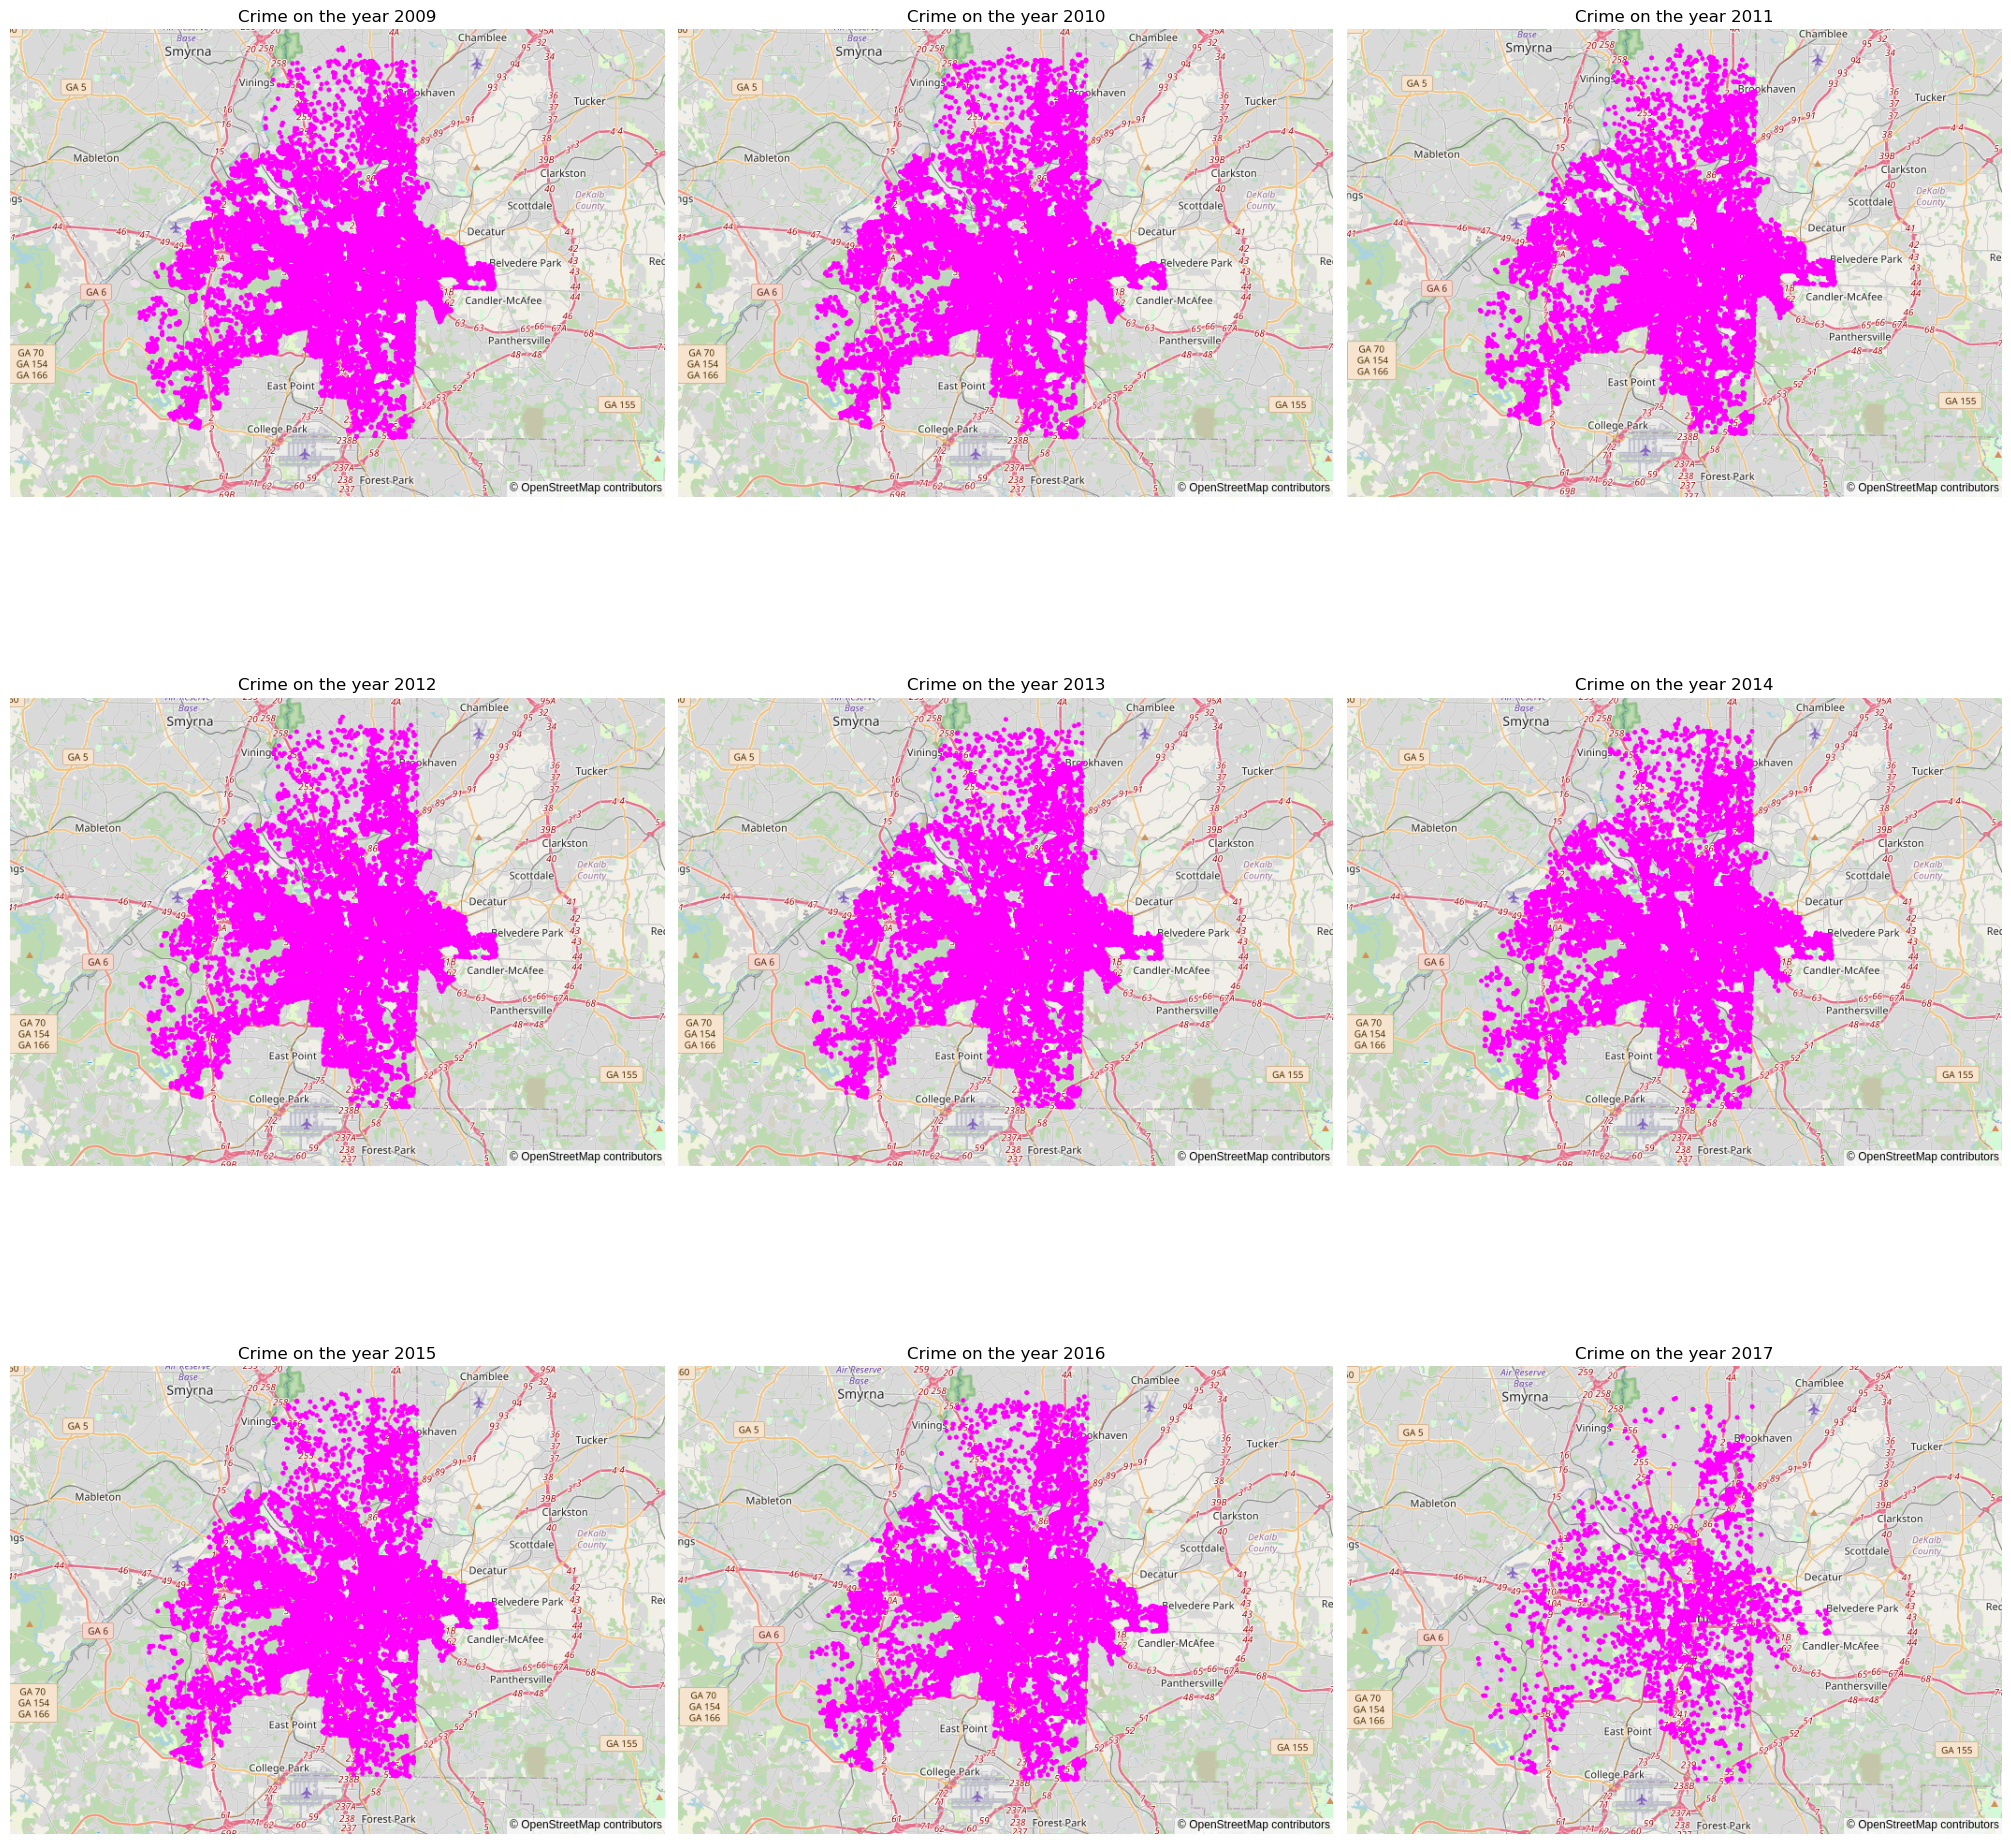

In [5]:
 # width, height in inches

fig, axs = plt.subplots(3, 3, figsize=(20, 20), constrained_layout = True)
for i in range(3):
    for j in range(3):
        index = (i * 3) + j
        axs[i, j].imshow(imgs[index])
        axs[i,j].set_title(f"Crime on the year {years[index]}")
        axs[i,j].axis('off')
        
        

In [6]:
# px.bar(x=crime_data['crime'],y=crime_data['neighborhood'])
# fig = px.bar(crime_data, x="neighborhood", y="crime")
crimes = crime_data['crime'].unique()
neighborhoods = crime_data['neighborhood'].unique()
crimesPerNeighborhood = pd.DataFrame({'neighborhood':crime_data['neighborhood'].unique()})

for crime in crimes:
    crimesPerNeighborhood[crime] = np.nan
    tempcol = []
    for neighborhood in neighborhoods:
         tempcol.append(len(crime_data[(crime_data['crime'] == crime) & (crime_data['neighborhood'] == neighborhood) ]))
    crimesPerNeighborhood[crime]=tempcol


crimesPerNeighborhood.head()


neighborhood  AUTO THEFT  LARCENY-FROM VEHICLE  \
0                   West End        1069                  1175   
1         Capitol View Manor          76                    42   
2             Betmar LaVilla          88                    82   
3            Old Fourth Ward        1002                  2644   
4  Peachtree Battle Alliance          12                    98   

   LARCENY-NON VEHICLE  BURGLARY-RESIDENCE  ROBBERY-PEDESTRIAN  AGG ASSAULT  \
0                 2127                 846                 532          440   
1                   52                  70                  13           20   
2                   44                  71                  21           18   
3                 1855                 843                 497          500   
4                   28                  34                   3            3   

   RAPE  BURGLARY-NONRES  HOMICIDE  ROBBERY-RESIDENCE  ROBBERY-COMMERCIAL  
0    19              206        21                 31                 106  
1     1               14         2                  5                   1  
2     1               11         1                  2                   1  
3    30              202        24                 62                  67  
4     0                2         1                  0                   0

In [7]:
px.bar(crimesPerNeighborhood.sample(n=100), y='neighborhood', x=crimesPerNeighborhood.columns.values.tolist()[1:], title="Types of crimes commited per neighborhood",
labels=dict(value="Crimes commited", variable="Crimes"),  width=1500, height=2000)

